The following notebook contains all the code necessary to produce the panels presented in __Figure 3 and Figure S4 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 CMIP6 preindustrial control output provided through the Earth System Grid Federation (ESGF) (Krasting et al., 2018):

> Krasting, J. P., and Coauthors, 2018a: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8669.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import momlevel as ml

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 12,6   #default figure size

### Load datasets needed for assessment. The piControl field is sliced to only load the corresponding years that overlap with the experiments.

In [2]:
## column integrated water vapor
esm4_ant1_wvp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.WVP.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_wvp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.WVP.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_wvp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.WVP.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_wvp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.WVP.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_wvp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos/ts/monthly/5yr/*.WVP.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_wvp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos/ts/monthly/5yr/*.WVP.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [3]:
## low cloud amount
esm4_ant1_low_cld = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.low_cld_amt.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_low_cld = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.low_cld_amt.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_low_cld = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.low_cld_amt.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_low_cld = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.low_cld_amt.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_low_cld = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.low_cld_amt.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_low_cld = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.low_cld_amt.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [4]:
## Total precipitation rate
esm4_ant1_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_precip = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.precip.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_precip = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.precip.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [5]:
## top of atmosphere outgoing longwave radiation
esm4_ant1_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_olr = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_olr = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.olr.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [6]:
## shortwave radiation upwelling top of the atmosphere
esm4_ant1_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_swup_toa = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_swup_toa = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.swup_toa.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

### For precip and WVP, Create time average of last 20 years of the perturbation experiments, load piControl into memory, create ensemble averages and compute differences.

In [7]:
esm4_ant1_precip_last20 = esm4_ant1_precip.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_precip_last20 = esm4_ant2_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_precip_last20 = esm4_ant3_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_precip_last20 = esm4_ant4_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_precip_last20 = esm4_ant5_precip.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_precip_ave = esm4_piC_precip.mean(dim='time').load()

In [8]:
esm4_ant_precip_ens = xr.concat([esm4_ant1_precip_last20,
                         esm4_ant2_precip_last20,
                         esm4_ant3_precip_last20,
                         esm4_ant4_precip_last20,
                         esm4_ant5_precip_last20],dim='member')
esm4_ant_precip_ens_ave = esm4_ant_precip_ens.mean(dim='member')

In [10]:
esm4_ant1_precip_diff = esm4_ant1_precip_last20 - esm4_piC_precip_ave
esm4_ant2_precip_diff = esm4_ant2_precip_last20 - esm4_piC_precip_ave
esm4_ant3_precip_diff = esm4_ant3_precip_last20 - esm4_piC_precip_ave 
esm4_ant4_precip_diff = esm4_ant4_precip_last20 - esm4_piC_precip_ave 
esm4_ant5_precip_diff = esm4_ant5_precip_last20 - esm4_piC_precip_ave 
esm4_ens_precip_diff = esm4_ant_precip_ens_ave - esm4_piC_precip_ave 

In [11]:
abs_diff_precip_ant1 = abs(esm4_ant1_precip_diff)
abs_diff_precip_ant2 = abs(esm4_ant2_precip_diff)
abs_diff_precip_ant3 = abs(esm4_ant3_precip_diff)
abs_diff_precip_ant4 = abs(esm4_ant4_precip_diff)
abs_diff_precip_ant5 = abs(esm4_ant5_precip_diff)
abs_diff_precip_ens = abs(esm4_ens_precip_diff)

In [12]:
%%time
esm4_piC_precip_ann = ml.util.annual_average(esm4_piC_precip, tcoord='time')
esm4_piC_precip_ann_20 = esm4_piC_precip_ann.rolling(time=20, center=True).mean()
esm4_piC_precip_ann_20_std = esm4_piC_precip_ann_20.std(dim='time')

CPU times: user 16.9 s, sys: 440 ms, total: 17.4 s
Wall time: 19.2 s


In [13]:
ant1_lt_1p64_std_precip = abs_diff_precip_ant1.where(abs_diff_precip_ant1<1.64*esm4_piC_precip_ann_20_std)
ant2_lt_1p64_std_precip = abs_diff_precip_ant2.where(abs_diff_precip_ant2<1.64*esm4_piC_precip_ann_20_std)
ant3_lt_1p64_std_precip = abs_diff_precip_ant3.where(abs_diff_precip_ant3<1.64*esm4_piC_precip_ann_20_std)
ant4_lt_1p64_std_precip = abs_diff_precip_ant4.where(abs_diff_precip_ant4<1.64*esm4_piC_precip_ann_20_std)
ant5_lt_1p64_std_precip = abs_diff_precip_ant5.where(abs_diff_precip_ant5<1.64*esm4_piC_precip_ann_20_std)
ens_lt_1p64_std_precip = abs_diff_precip_ens.where(abs_diff_precip_ens<1.64*esm4_piC_precip_ann_20_std)

In [14]:
esm4_ant1_wvp_last20 = esm4_ant1_wvp.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_wvp_last20 = esm4_ant2_wvp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_wvp_last20 = esm4_ant3_wvp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_wvp_last20 = esm4_ant4_wvp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_wvp_last20 = esm4_ant5_wvp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_wvp_ave = esm4_piC_wvp.mean(dim='time').load()

In [15]:
esm4_ant_wvp_ens = xr.concat([esm4_ant1_wvp_last20,
                         esm4_ant2_wvp_last20,
                         esm4_ant3_wvp_last20,
                         esm4_ant4_wvp_last20,
                         esm4_ant5_wvp_last20],dim='member')
esm4_ant_wvp_ens_ave = esm4_ant_wvp_ens.mean(dim='member')

In [16]:
esm4_ant1_wvp_diff = esm4_ant1_wvp_last20 - esm4_piC_wvp_ave
esm4_ant2_wvp_diff = esm4_ant2_wvp_last20 - esm4_piC_wvp_ave
esm4_ant3_wvp_diff = esm4_ant3_wvp_last20 - esm4_piC_wvp_ave 
esm4_ant4_wvp_diff = esm4_ant4_wvp_last20 - esm4_piC_wvp_ave 
esm4_ant5_wvp_diff = esm4_ant5_wvp_last20 - esm4_piC_wvp_ave 
esm4_ens_wvp_diff = esm4_ant_wvp_ens_ave - esm4_piC_wvp_ave 

In [17]:
abs_diff_wvp_ant1 = abs(esm4_ant1_wvp_diff)
abs_diff_wvp_ant2 = abs(esm4_ant2_wvp_diff)
abs_diff_wvp_ant3 = abs(esm4_ant3_wvp_diff)
abs_diff_wvp_ant4 = abs(esm4_ant4_wvp_diff)
abs_diff_wvp_ant5 = abs(esm4_ant5_wvp_diff)
abs_diff_wvp_ens = abs(esm4_ens_wvp_diff)

In [18]:
%%time
esm4_piC_wvp_ann = ml.util.annual_average(esm4_piC_wvp, tcoord='time')
esm4_piC_wvp_ann_20 = esm4_piC_wvp_ann.rolling(time=20, center=True).mean()
esm4_piC_wvp_ann_20_std = esm4_piC_wvp_ann_20.std(dim='time')

CPU times: user 16.5 s, sys: 163 ms, total: 16.7 s
Wall time: 17.8 s


In [20]:
ant1_lt_1p64_std_wvp = abs_diff_wvp_ant1.where(abs_diff_wvp_ant1<1.64*esm4_piC_wvp_ann_20_std)
ant2_lt_1p64_std_wvp = abs_diff_wvp_ant2.where(abs_diff_wvp_ant2<1.64*esm4_piC_wvp_ann_20_std)
ant3_lt_1p64_std_wvp = abs_diff_wvp_ant3.where(abs_diff_wvp_ant3<1.64*esm4_piC_wvp_ann_20_std)
ant4_lt_1p64_std_wvp = abs_diff_wvp_ant4.where(abs_diff_wvp_ant4<1.64*esm4_piC_wvp_ann_20_std)
ant5_lt_1p64_std_wvp = abs_diff_wvp_ant5.where(abs_diff_wvp_ant5<1.64*esm4_piC_wvp_ann_20_std)
ens_lt_1p64_std_wvp = abs_diff_wvp_ens.where(abs_diff_wvp_ens<1.64*esm4_piC_wvp_ann_20_std)

### Function to plot WVP maps

In [21]:
def plot_globalmap_wvp_diff(array_wvp,array_precip,array_precip_ant,arraystd, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = array_wvp.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-2,vmax=2, levels=60, 
        cmap=cmocean.cm.balance,extend='both'
    )
    
    array_precip.plot.contour(
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=2,
    )
    
    array_precip_ant.plot.contour(
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=2,
        colors='dimgrey',extend='both'
    )
    
    arraystd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

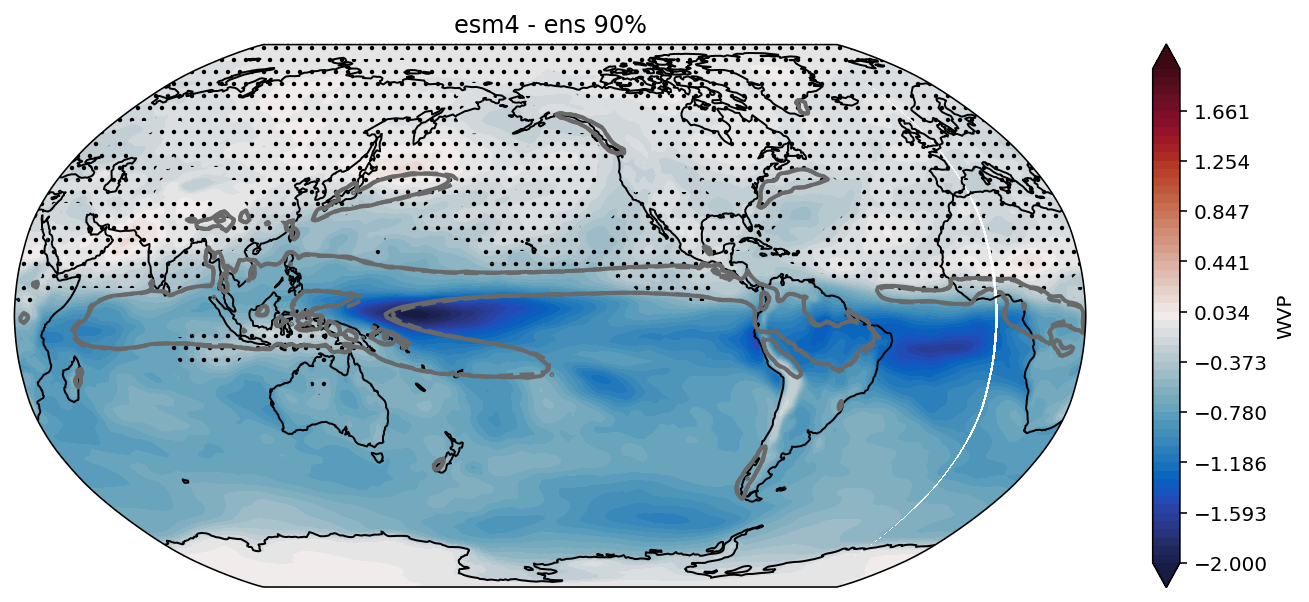

In [22]:
plot_globalmap_wvp_diff(esm4_ens_wvp_diff.WVP,esm4_piC_precip_ave.precip,esm4_ant_precip_ens_ave.precip,
                        ens_lt_1p64_std_wvp.WVP,
                        'esm4 - ens 90%')

plt.savefig('esm4_ens_wvp_90_CI_precip.pdf',dpi=600)

### Repeat above steps for low clouds

In [31]:
esm4_ant1_low_cld_last20 = esm4_ant1_low_cld.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_low_cld_last20 = esm4_ant2_low_cld.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_low_cld_last20 = esm4_ant3_low_cld.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_low_cld_last20 = esm4_ant4_low_cld.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_low_cld_last20 = esm4_ant5_low_cld.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_low_cld_ave = esm4_piC_low_cld.mean(dim='time').load()

In [32]:
esm4_ant_low_cld_ens = xr.concat([esm4_ant1_low_cld_last20,
                         esm4_ant2_low_cld_last20,
                         esm4_ant3_low_cld_last20,
                         esm4_ant4_low_cld_last20,
                         esm4_ant5_low_cld_last20],dim='member')
esm4_ant_low_cld_ens_ave = esm4_ant_low_cld_ens.mean(dim='member')

In [33]:
esm4_ant1_low_cld_diff = esm4_ant1_low_cld_last20 - esm4_piC_low_cld_ave
esm4_ant2_low_cld_diff = esm4_ant2_low_cld_last20 - esm4_piC_low_cld_ave
esm4_ant3_low_cld_diff = esm4_ant3_low_cld_last20 - esm4_piC_low_cld_ave 
esm4_ant4_low_cld_diff = esm4_ant4_low_cld_last20 - esm4_piC_low_cld_ave 
esm4_ant5_low_cld_diff = esm4_ant5_low_cld_last20 - esm4_piC_low_cld_ave 
esm4_ens_low_cld_diff = esm4_ant_low_cld_ens_ave - esm4_piC_low_cld_ave 

In [34]:
abs_diff_low_cld_ant1 = abs(esm4_ant1_low_cld_diff)
abs_diff_low_cld_ant2 = abs(esm4_ant2_low_cld_diff)
abs_diff_low_cld_ant3 = abs(esm4_ant3_low_cld_diff)
abs_diff_low_cld_ant4 = abs(esm4_ant4_low_cld_diff)
abs_diff_low_cld_ant5 = abs(esm4_ant5_low_cld_diff)
abs_diff_low_cld_ens = abs(esm4_ens_low_cld_diff)

In [35]:
%%time
esm4_piC_low_cld_ann = ml.util.annual_average(esm4_piC_low_cld, tcoord='time')
esm4_piC_low_cld_ann_20 = esm4_piC_low_cld_ann.rolling(time=20, center=True).mean()
esm4_piC_low_cld_ann_20_std = esm4_piC_low_cld_ann_20.std(dim='time')

CPU times: user 16.4 s, sys: 297 ms, total: 16.7 s
Wall time: 19 s


In [37]:
ant1_lt_1p64_std_low_cld = abs_diff_low_cld_ant1.where(abs_diff_low_cld_ant1<1.64*esm4_piC_low_cld_ann_20_std)
ant2_lt_1p64_std_low_cld = abs_diff_low_cld_ant2.where(abs_diff_low_cld_ant2<1.64*esm4_piC_low_cld_ann_20_std)
ant3_lt_1p64_std_low_cld = abs_diff_low_cld_ant3.where(abs_diff_low_cld_ant3<1.64*esm4_piC_low_cld_ann_20_std)
ant4_lt_1p64_std_low_cld = abs_diff_low_cld_ant4.where(abs_diff_low_cld_ant4<1.64*esm4_piC_low_cld_ann_20_std)
ant5_lt_1p64_std_low_cld = abs_diff_low_cld_ant5.where(abs_diff_low_cld_ant5<1.64*esm4_piC_low_cld_ann_20_std)
ens_lt_1p64_std_low_cld = abs_diff_low_cld_ens.where(abs_diff_low_cld_ens<1.64*esm4_piC_low_cld_ann_20_std)

In [38]:
def plot_globalmap_low_cld_diff_precip(array,array_precip,array_precip_ant,arraystd, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = array.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=60, 
        cmap=cmocean.cm.balance,extend='both'
    )
    
    array_precip.plot.contour(
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=2,
    )
    
    array_precip_ant.plot.contour(
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=2,
        colors='dimgrey',extend='both'
    )
    
    arraystd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

def plot_globalmap_low_cld_diff(array, arraystd, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = array.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=60, 
        cmap=cmocean.cm.balance,extend='both'
    )
    
    arraystd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

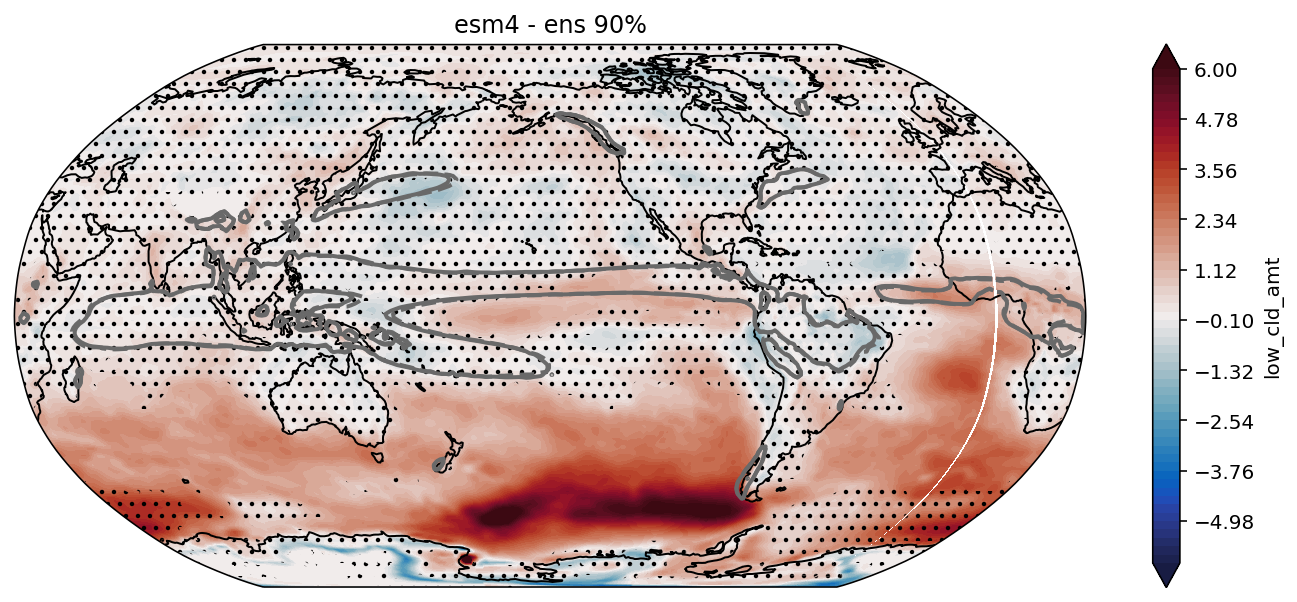

In [39]:
plot_globalmap_low_cld_diff_precip(esm4_ens_low_cld_diff.low_cld_amt,esm4_piC_precip_ave.precip,esm4_ant_precip_ens_ave.precip,
                        ens_lt_1p64_std_low_cld.low_cld_amt,
                        'esm4 - ens 90%')

plt.savefig('esm4_ens_low_cld_90_CI_precip.pdf',dpi=600)

### Repeat above steps for TOA olr and swup

In [46]:
def plot_globalmap_swup_diff(array,array_precip,array_precip_ant,arraystd, title):
    fig , ax = plt.subplots(figsize=(12, 5),
                          subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})
    ax = array.plot.contourf(
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=60, 
        cmap=cmocean.cm.balance,extend='both'
    )
    
    array_precip.plot.contour(
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=2,
    )
    
    array_precip_ant.plot.contour(
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=2,
        colors='dimgrey',extend='both'
    )
    
    
    arraystd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())
    
    ax.axes.coastlines()
    plt.title(title)

In [47]:
esm4_ant1_swup_toa_last20 = esm4_ant1_swup_toa.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_swup_toa_last20 = esm4_ant2_swup_toa.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_swup_toa_last20 = esm4_ant3_swup_toa.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_swup_toa_last20 = esm4_ant4_swup_toa.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_swup_toa_last20 = esm4_ant5_swup_toa.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_swup_toa_ave = esm4_piC_swup_toa.mean(dim='time').load()

In [48]:
esm4_ant_swup_toa_ens = xr.concat([esm4_ant1_swup_toa_last20,
                         esm4_ant2_swup_toa_last20,
                         esm4_ant3_swup_toa_last20,
                         esm4_ant4_swup_toa_last20,
                         esm4_ant5_swup_toa_last20],dim='member')
esm4_ant_swup_toa_ens_ave = esm4_ant_swup_toa_ens.mean(dim='member')

In [49]:
esm4_ant1_swup_toa_diff = esm4_ant1_swup_toa_last20 - esm4_piC_swup_toa_ave
esm4_ant2_swup_toa_diff = esm4_ant2_swup_toa_last20 - esm4_piC_swup_toa_ave
esm4_ant3_swup_toa_diff = esm4_ant3_swup_toa_last20 - esm4_piC_swup_toa_ave 
esm4_ant4_swup_toa_diff = esm4_ant4_swup_toa_last20 - esm4_piC_swup_toa_ave 
esm4_ant5_swup_toa_diff = esm4_ant5_swup_toa_last20 - esm4_piC_swup_toa_ave 
esm4_ens_swup_toa_diff = esm4_ant_swup_toa_ens_ave - esm4_piC_swup_toa_ave 

In [50]:
abs_diff_swup_toa_ant1 = abs(esm4_ant1_swup_toa_diff)
abs_diff_swup_toa_ant2 = abs(esm4_ant2_swup_toa_diff)
abs_diff_swup_toa_ant3 = abs(esm4_ant3_swup_toa_diff)
abs_diff_swup_toa_ant4 = abs(esm4_ant4_swup_toa_diff)
abs_diff_swup_toa_ant5 = abs(esm4_ant5_swup_toa_diff)
abs_diff_swup_toa_ens = abs(esm4_ens_swup_toa_diff)

In [51]:
%%time
esm4_piC_swup_toa_ann = ml.util.annual_average(esm4_piC_swup_toa, tcoord='time')
esm4_piC_swup_toa_ann_20 = esm4_piC_swup_toa_ann.rolling(time=20, center=True).mean()
esm4_piC_swup_toa_ann_20_std = esm4_piC_swup_toa_ann_20.std(dim='time')

CPU times: user 16.2 s, sys: 226 ms, total: 16.4 s
Wall time: 16.4 s


In [54]:
ant1_lt_1p64_std_swup_toa = abs_diff_swup_toa_ant1.where(abs_diff_swup_toa_ant1<1.64*esm4_piC_swup_toa_ann_20_std)
ant2_lt_1p64_std_swup_toa = abs_diff_swup_toa_ant2.where(abs_diff_swup_toa_ant2<1.64*esm4_piC_swup_toa_ann_20_std)
ant3_lt_1p64_std_swup_toa = abs_diff_swup_toa_ant3.where(abs_diff_swup_toa_ant3<1.64*esm4_piC_swup_toa_ann_20_std)
ant4_lt_1p64_std_swup_toa = abs_diff_swup_toa_ant4.where(abs_diff_swup_toa_ant4<1.64*esm4_piC_swup_toa_ann_20_std)
ant5_lt_1p64_std_swup_toa = abs_diff_swup_toa_ant5.where(abs_diff_swup_toa_ant5<1.64*esm4_piC_swup_toa_ann_20_std)
ens_lt_1p64_std_swup_toa = abs_diff_swup_toa_ens.where(abs_diff_swup_toa_ens<1.64*esm4_piC_swup_toa_ann_20_std)

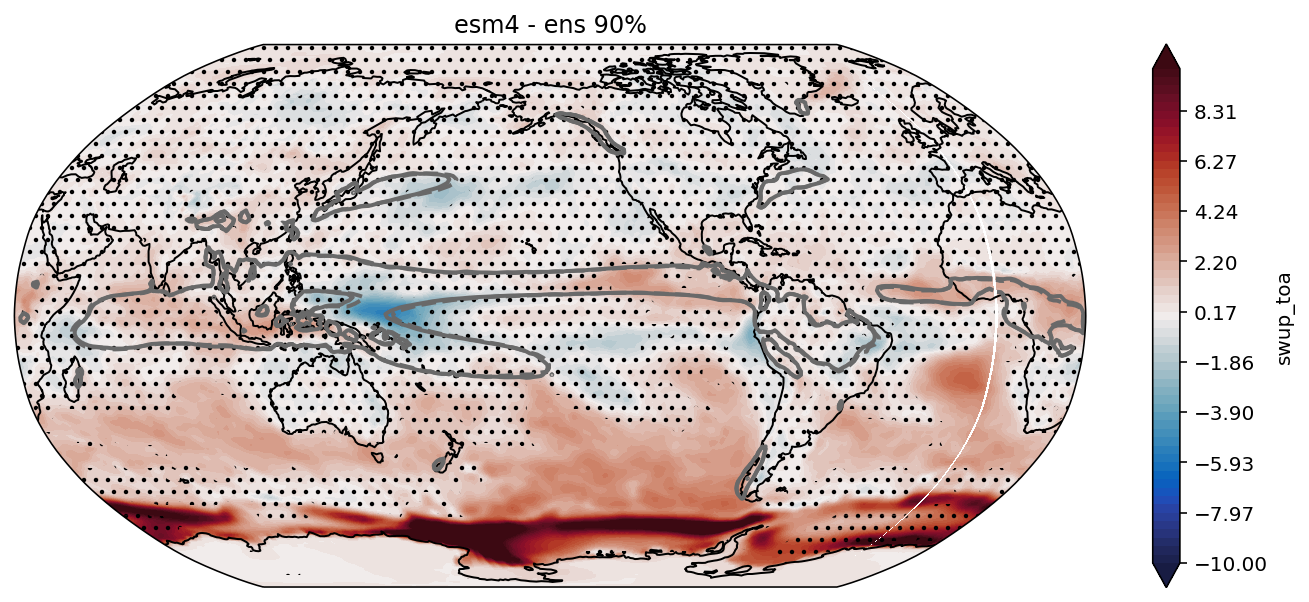

In [55]:
plot_globalmap_swup_diff(esm4_ens_swup_toa_diff.swup_toa,esm4_piC_precip_ave.precip,esm4_ant_precip_ens_ave.precip,
                        ens_lt_1p64_std_swup_toa.swup_toa,
                        'esm4 - ens 90%')

plt.savefig('esm4_ens_swup_toa_90_CI_precip.pdf',dpi=600)

In [61]:
esm4_ant1_olr_last20 = esm4_ant1_olr.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_olr_last20 = esm4_ant2_olr.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_olr_last20 = esm4_ant3_olr.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_olr_last20 = esm4_ant4_olr.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_olr_last20 = esm4_ant5_olr.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_olr_ave = esm4_piC_olr.mean(dim='time').load()

In [62]:
esm4_ant_olr_ens = xr.concat([esm4_ant1_olr_last20,
                         esm4_ant2_olr_last20,
                         esm4_ant3_olr_last20,
                         esm4_ant4_olr_last20,
                         esm4_ant5_olr_last20],dim='member')
esm4_ant_olr_ens_ave = esm4_ant_olr_ens.mean(dim='member')

In [63]:
esm4_ant1_olr_diff = esm4_ant1_olr_last20 - esm4_piC_olr_ave
esm4_ant2_olr_diff = esm4_ant2_olr_last20 - esm4_piC_olr_ave
esm4_ant3_olr_diff = esm4_ant3_olr_last20 - esm4_piC_olr_ave 
esm4_ant4_olr_diff = esm4_ant4_olr_last20 - esm4_piC_olr_ave 
esm4_ant5_olr_diff = esm4_ant5_olr_last20 - esm4_piC_olr_ave 
esm4_ens_olr_diff = esm4_ant_olr_ens_ave - esm4_piC_olr_ave 

In [64]:
abs_diff_olr_ant1 = abs(esm4_ant1_olr_diff)
abs_diff_olr_ant2 = abs(esm4_ant2_olr_diff)
abs_diff_olr_ant3 = abs(esm4_ant3_olr_diff)
abs_diff_olr_ant4 = abs(esm4_ant4_olr_diff)
abs_diff_olr_ant5 = abs(esm4_ant5_olr_diff)
abs_diff_olr_ens = abs(esm4_ens_olr_diff)

In [65]:
%%time
esm4_piC_olr_ann = ml.util.annual_average(esm4_piC_olr, tcoord='time')
esm4_piC_olr_ann_20 = esm4_piC_olr_ann.rolling(time=20, center=True).mean()
esm4_piC_olr_ann_20_std = esm4_piC_olr_ann_20.std(dim='time')

CPU times: user 17.7 s, sys: 928 ms, total: 18.6 s
Wall time: 20.7 s


In [67]:
ant1_lt_1p64_std_olr = abs_diff_olr_ant1.where(abs_diff_olr_ant1<1.64*esm4_piC_olr_ann_20_std)
ant2_lt_1p64_std_olr = abs_diff_olr_ant2.where(abs_diff_olr_ant2<1.64*esm4_piC_olr_ann_20_std)
ant3_lt_1p64_std_olr = abs_diff_olr_ant3.where(abs_diff_olr_ant3<1.64*esm4_piC_olr_ann_20_std)
ant4_lt_1p64_std_olr = abs_diff_olr_ant4.where(abs_diff_olr_ant4<1.64*esm4_piC_olr_ann_20_std)
ant5_lt_1p64_std_olr = abs_diff_olr_ant5.where(abs_diff_olr_ant5<1.64*esm4_piC_olr_ann_20_std)
ens_lt_1p64_std_olr = abs_diff_olr_ens.where(abs_diff_olr_ens<1.64*esm4_piC_olr_ann_20_std)

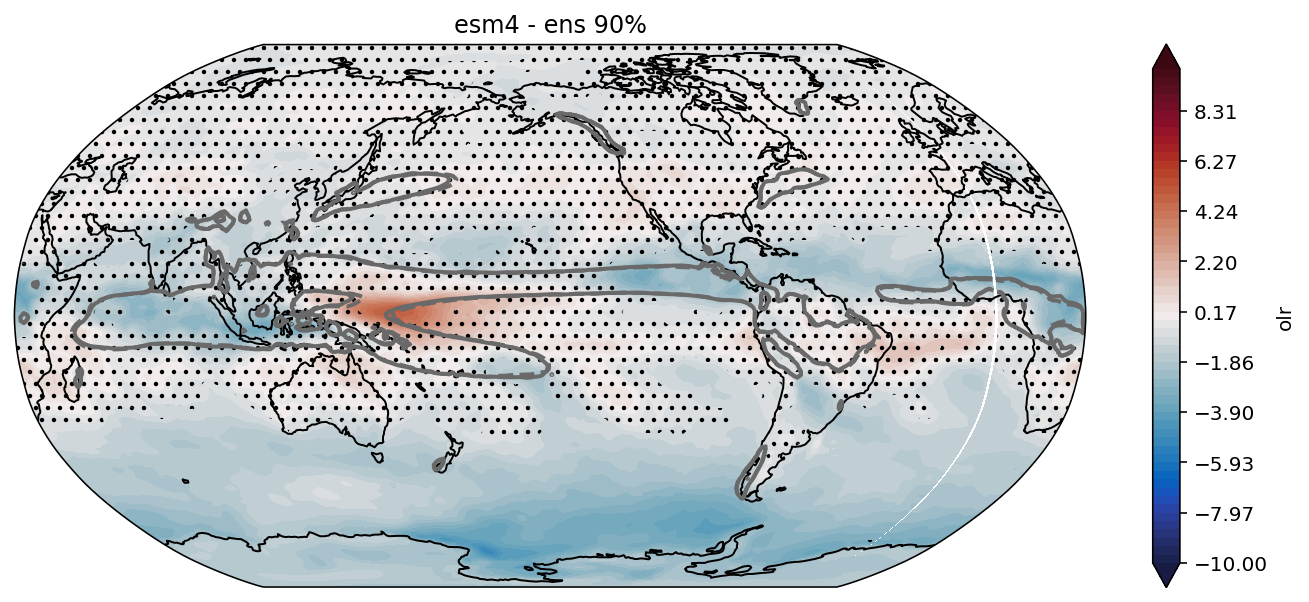

In [70]:
plot_globalmap_swup_diff(esm4_ens_olr_diff.olr,esm4_piC_precip_ave.precip,esm4_ant_precip_ens_ave.precip,
                        ens_lt_1p64_std_olr.olr,
                        'esm4 - ens 90%')

plt.savefig('esm4_ens_olr_90_CI_precip.pdf',dpi=600)

### All plots together -- note the error of the unit lable on the WVP panel. This was corrected in the publication, it should be (kg / m2).

CPU times: user 1min 14s, sys: 14.7 s, total: 1min 29s
Wall time: 1min 40s


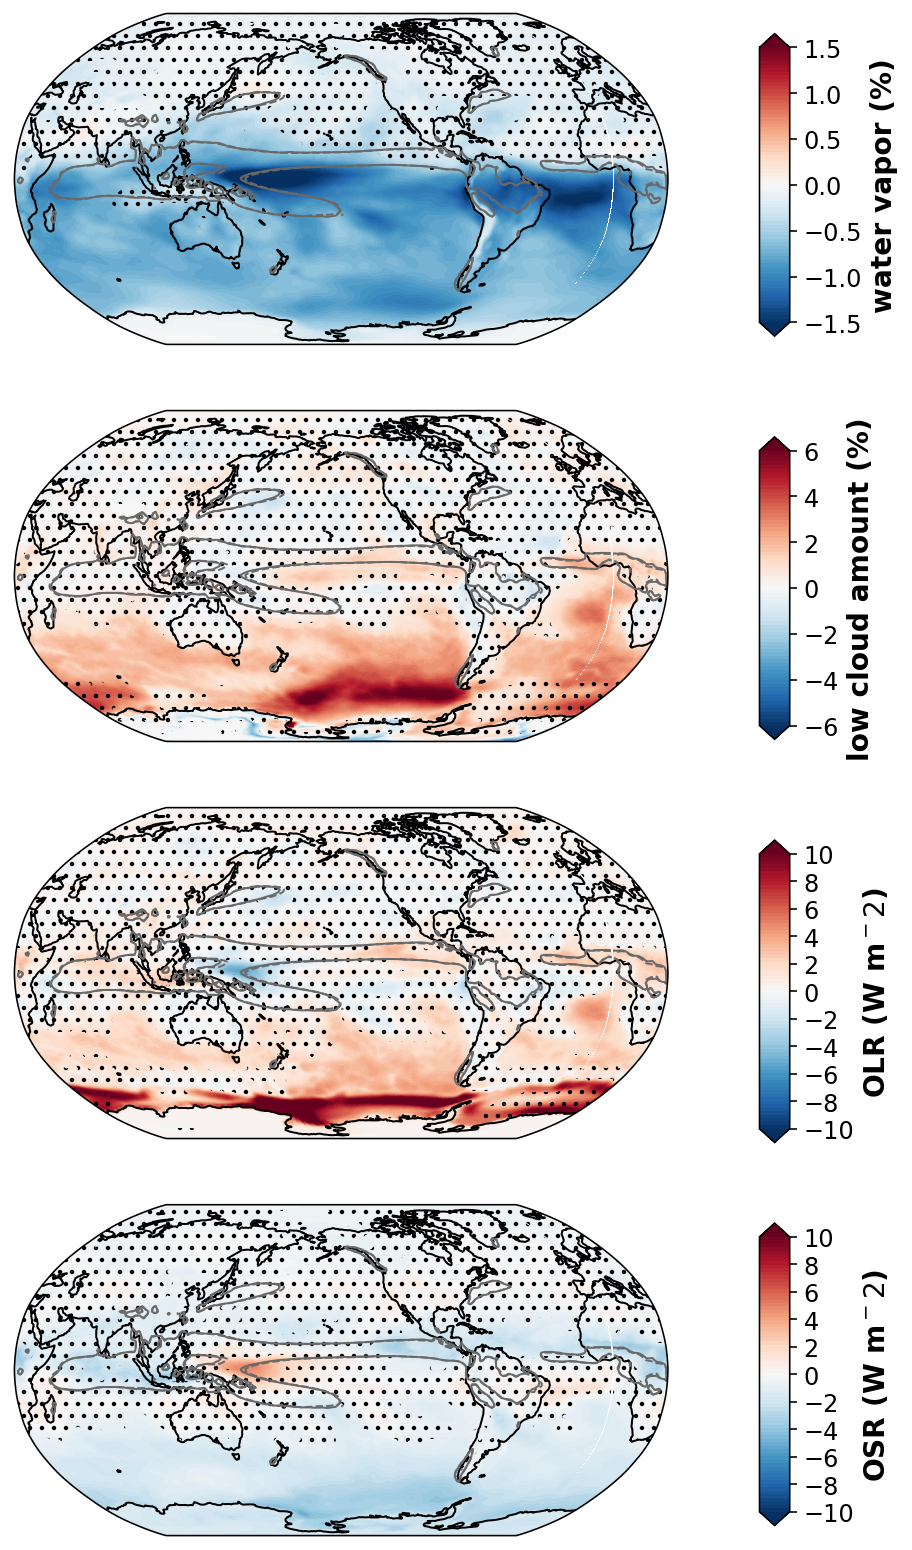

In [73]:
%%time
fig, (ax0,ax1,ax2,ax3) = plt.subplots(ncols=1,
                                nrows=4,
                                figsize=(14,14),
                                subplot_kw={'projection': ccrs.Robinson(central_longitude=(-150))})


## add custom colorbars -- wvp
cax_wvp = fig.add_axes([0.72, 0.72, 0.015, 0.15])
cbar_wvp = esm4_ens_wvp_diff.WVP.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-1.5,vmax=1.5, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_wvp = plt.colorbar(cbar_wvp, cax=cax_wvp, ticks=[-1.5,-1,-0.5,0,0.5,1,1.5], orientation="vertical")
cbr_wvp.set_label(label='water vapor (%)', fontsize=14, weight='bold')
cbr_wvp.ax.tick_params(labelsize='large')

## add custom colorbars -- low cloud
cax_low_cld = fig.add_axes([0.72, 0.52, 0.015, 0.15])
cbar_low_cld = esm4_ens_low_cld_diff.low_cld_amt.plot.contourf(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_low_cld = plt.colorbar(cbar_low_cld, cax=cax_low_cld, ticks=[-6,-4,-2,0,2,4,6], orientation="vertical")
cbr_low_cld.set_label(label='low cloud amount (%)', fontsize=14, weight='bold')
cbr_low_cld.ax.tick_params(labelsize='large')

## add custom colorbars -- TOA OLR
cax_olr = fig.add_axes([0.72, 0.32, 0.015, 0.15])
cbar_olr = esm4_ens_olr_diff.olr.plot.contourf(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_olr = plt.colorbar(cbar_olr, cax=cax_olr, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10], orientation="vertical")
cbr_olr.set_label(label='OLR (W m${^-2}$)', fontsize=14, weight='bold')
cbr_olr.ax.tick_params(labelsize='large')


## add custom colorbars -- TOA OLR
cax_swup_toa = fig.add_axes([0.72, 0.13, 0.015, 0.15])
cbar_swup_toa = esm4_ens_swup_toa_diff.swup_toa.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)
cbr_swup_toa = plt.colorbar(cbar_swup_toa, cax=cax_swup_toa, ticks=[-10,-8,-6,-4,-2,0,2,4,6,8,10], orientation="vertical")
cbr_swup_toa.set_label(label='OSR (W m${^-2}$)', fontsize=14, weight='bold')
cbr_swup_toa.ax.tick_params(labelsize='large')



#########

##### -------- add plots
#######

## wvp
esm4_ens_wvp_diff.WVP.plot.contourf(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=-1.5,vmax=1.5, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip_ave.precip.plot.contour(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_ant_precip_ens_ave.precip.plot.contour(ax=ax0,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
ens_lt_1p64_std_wvp.WVP.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

##### low clouds

esm4_ens_low_cld_diff.low_cld_amt.plot.contourf(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=-6,vmax=6, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip_ave.precip.plot.contour(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_ant_precip_ens_ave.precip.plot.contour(ax=ax1,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
    
ens_lt_1p64_std_low_cld.low_cld_amt.plot.contourf(ax=ax1, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())



######### OSW

esm4_ens_swup_toa_diff.swup_toa.plot.contourf(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip_ave.precip.plot.contour(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_ant_precip_ens_ave.precip.plot.contour(ax=ax2,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
                      
ens_lt_1p64_std_swup_toa.swup_toa.plot.contourf(ax=ax2,hatches=['..'],cmap=plt.get_cmap('gray'),
        alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

######### OLR

esm4_ens_olr_diff.olr.plot.contourf(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=-10,vmax=10, levels=80, 
        cmap='RdBu_r',extend='both',
        add_colorbar=False)

esm4_piC_precip_ave.precip.plot.contour(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, 
        colors='dimgrey',extend='both',linestyles='--',linewidths=1,
    )
    
esm4_ant_precip_ens_ave.precip.plot.contour(ax=ax3,
        transform=ccrs.PlateCarree(),
        vmin=0,vmax=0.00018, levels=4, linewidths=1,
        colors='dimgrey',extend='both'
    )
                      
ens_lt_1p64_std_olr.olr.plot.contourf(ax=ax3,hatches=['..'],cmap=plt.get_cmap('gray'),
        alpha=0, add_colorbar=False,transform=ccrs.PlateCarree())

#### add details
ax0.axes.coastlines()
ax1.axes.coastlines()
ax2.axes.coastlines()
ax3.axes.coastlines()

ax0.set_title('')
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')


plt.savefig('esm4_ens_all_90CI_precip_over.pdf',dpi=600)